In [64]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import datetime as dt



In [65]:
df = pandas.read_csv('../data/covidsp.csv',sep=';',index_col=0, parse_dates=True)

In [66]:
print(df.info(verbose=True) ,"\n")

print ("Dados dos últimos 7 dias absolutos" , "\n")
print(df.tail(7))
print("")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2020-03-23 to 2020-05-09
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Suspects        48 non-null     int64
 1   ConfirmedCases  48 non-null     int64
 2   DeathsSivep     48 non-null     int64
 3   DeathsProAim    48 non-null     int64
 4   CtiUsage        48 non-null     int64
dtypes: int64(5)
memory usage: 2.2 KB
None 

Dados dos últimos 7 dias absolutos 

            Suspects  ConfirmedCases  DeathsSivep  DeathsProAim  CtiUsage
Date                                                                     
2020-05-03     81543           20464         1693          1744        76
2020-05-04     82579           20848         1709          1775        82
2020-05-05     87871           22249         1826          1832        87
2020-05-06     93312           23807         1945          1928        82
2020-05-07     98448           25043         2013  

In [67]:
daily_data = pandas.DataFrame()
daily_data['DeathPerDay']=df['DeathsSivep'].diff()
daily_data['DeathTotal']=df['DeathsSivep']
daily_data['ConfirmedTotal']=df['ConfirmedCases']
daily_data['ConfirmedPerDay']=df['ConfirmedCases'].diff()
daily_data['SuspectedPerDay']=df['Suspects'].diff()
daily_data['CtiUsage']=df['CtiUsage']
daily_data['Letality'] = 100.0*(df['DeathsSivep']/df['ConfirmedCases'])


In [68]:
print ("Dados dos últimos dias")
print(daily_data.info(verbose=True))
print(daily_data.tail(7))

Dados dos últimos dias
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2020-03-23 to 2020-05-09
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DeathPerDay      47 non-null     float64
 1   DeathTotal       48 non-null     int64  
 2   ConfirmedTotal   48 non-null     int64  
 3   ConfirmedPerDay  47 non-null     float64
 4   SuspectedPerDay  47 non-null     float64
 5   CtiUsage         48 non-null     int64  
 6   Letality         48 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 3.0 KB
None
            DeathPerDay  DeathTotal  ConfirmedTotal  ConfirmedPerDay  \
Date                                                                   
2020-05-03         12.0        1693           20464            567.0   
2020-05-04         16.0        1709           20848            384.0   
2020-05-05        117.0        1826           22249           1401.0   
2020-05-06        119.0   

In [69]:
weekly_data = pandas.DataFrame()
weekly_data['DeathPerWeek']=df['DeathsSivep'].diff(periods=7)/7
weekly_data['ConfirmedPerWeek']=df['ConfirmedCases'].diff(periods=7)/7

print ("Dados das últimas semanas")
print(weekly_data.info(verbose=True))
print(weekly_data.tail(4))

Dados das últimas semanas
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2020-03-23 to 2020-05-09
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DeathPerWeek      41 non-null     float64
 1   ConfirmedPerWeek  41 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB
None
            DeathPerWeek  ConfirmedPerWeek
Date                                      
2020-05-06     69.857143       1126.000000
2020-05-07     68.571429        943.571429
2020-05-08     72.571429        942.000000
2020-05-09     80.142857       1073.857143


In [70]:
#Configurtação dos gráficos  
def plot_chart(df, column_name, chart_title):
    
  #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
  #ax = df[column_name].plot(kind='bar', figsize=(10,5), title=chart_title, grid=True);
  #https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes
  #ax.set_xticklabels([temp.strftime("%m-%d") for temp in df.index]);
    
  #https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/  
  fig, ax = plt.subplots(figsize=(12, 6));
    
    
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
  ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
  fig.autofmt_xdate()  
    
  ax.grid(zorder=0)
  # Add x-axis and y-axis
  ax.bar(df.index.values,
        df[column_name],
        color='blue');
  # Set title and labels for axes
  ax.set(xlabel="Data",
       title=chart_title);
  # Rotate tick marks on x-axis
  plt.setp(ax.get_xticklabels(), rotation=90)
  plt.show()
  

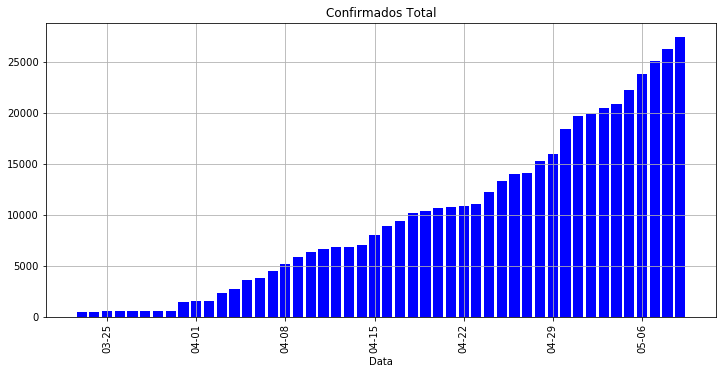

In [71]:
plot_chart(daily_data,'ConfirmedTotal','Confirmados Total')

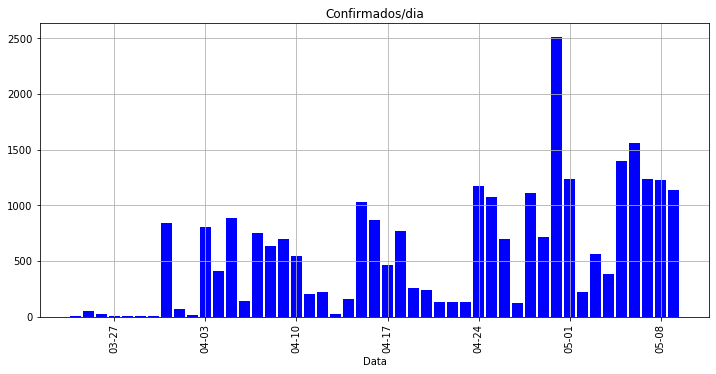

In [72]:
plot_chart(daily_data,'ConfirmedPerDay','Confirmados/dia')


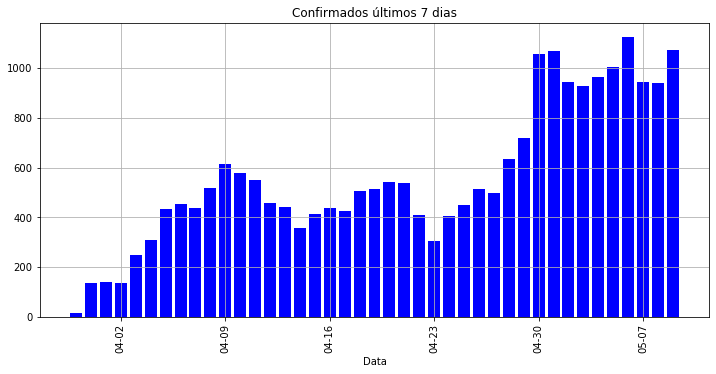

In [73]:
plot_chart(weekly_data,'ConfirmedPerWeek','Confirmados últimos 7 dias')

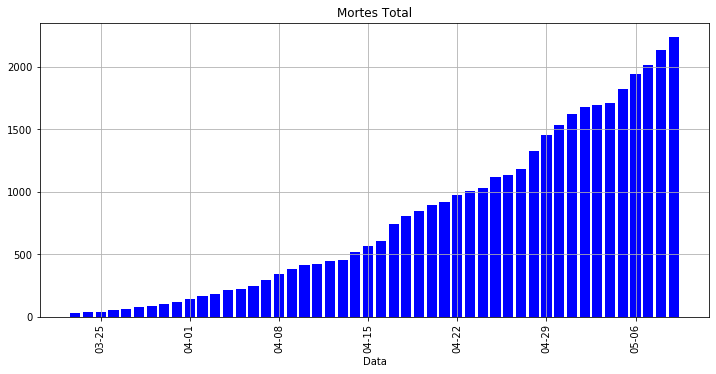

In [74]:
plot_chart(daily_data,'DeathTotal','Mortes Total')

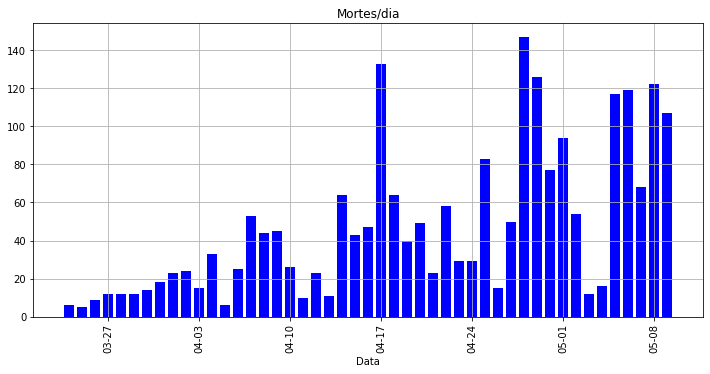

In [75]:
plot_chart(daily_data,'DeathPerDay','Mortes/dia')

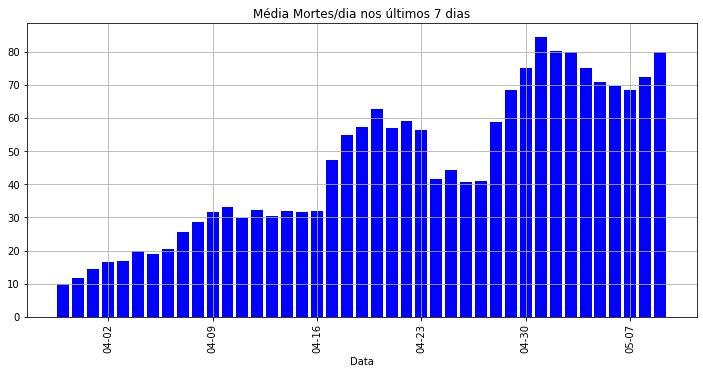

In [76]:
plot_chart(weekly_data,'DeathPerWeek','Média Mortes/dia nos últimos 7 dias')

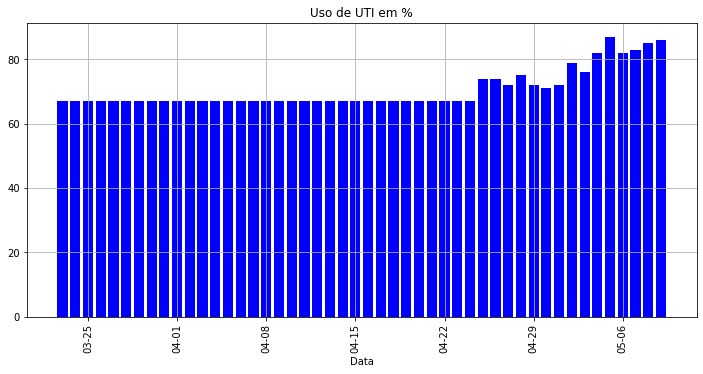

In [77]:
plot_chart(daily_data,'CtiUsage','Uso de UTI em %')

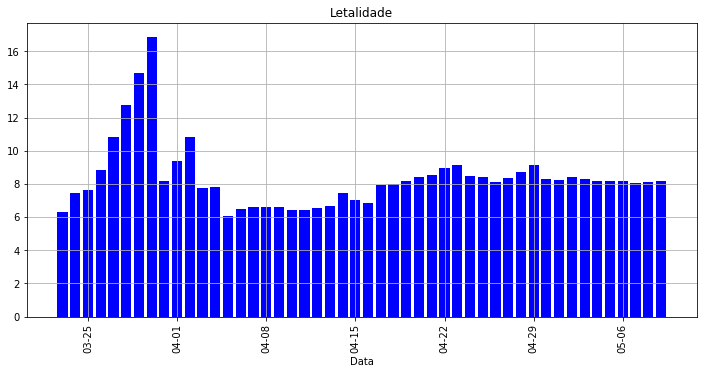

In [78]:
plot_chart(daily_data,'Letality','Letalidade')